In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw(G, **args):
    nx.draw(G, with_labels=True, font_size=8, **args)
    plt.show()

def component(G, N, i):
    C = []
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.append(node)
        for j in G[node]:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components(G):
    C = []
    N = set(G)
    while N:
        C.append(component(G, N, next(iter(N))))
    return C

Finished building


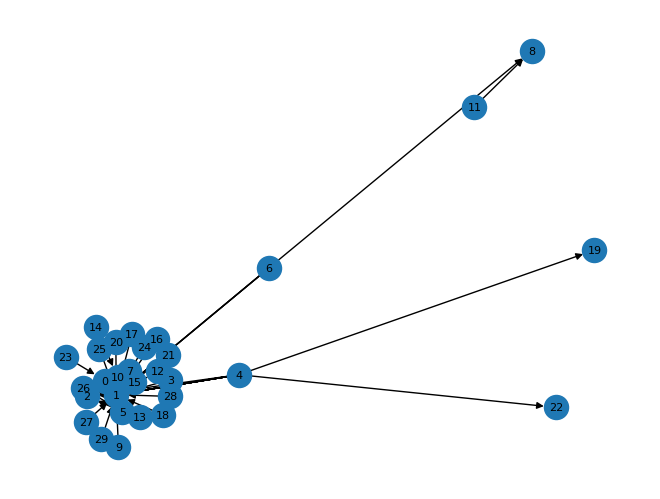


26
3


In [49]:
def component_directed(G, N, i, correct):
    C = set()
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.add(node)
        neighbours = G.successors(node)
        if correct:
            neighbours = G.successors(node)
        else:
            neighbours = G.predecessors(node)
        for j in neighbours:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components_directed(G):
    C = []
    N = set(G)
    while N:
        first = component_directed(G, N, next(iter(N)), correct=True)
        second = component_directed(G, first, next(iter(first)), correct=False)
        C.append(second)
        N.update(first)
    return C

D2 = nx.scale_free_graph(30)
print("Finished building")
draw(D2)
scc_mine = sorted(components_directed(D2), key=len, reverse=True)
lengths = [len(c) for c in scc_mine]
print()
print(len(lengths))
print(lengths[0])

In [50]:
#D = nx.read_pajek('enron.net')
n = len(D)
m = D.number_of_edges()
print(n)
print(m)
scc_mine = sorted(components_directed(D), key=len, reverse=True)
lengths = [len(c) for c in scc_mine]
print(len(lengths))
print(lengths[0])

87273
1148072
76705
9164


In [51]:
print(sum(lengths))

87273


In [ ]:
G = nx.read_pajek('collaboration_imdb.net')
#G = nx.read_pajek('karate_club.net')
#draw(G)
cc_nx = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(cc_nx)
print(len(cc_nx))


In [ ]:
cc_mine = [len(c) for c in sorted(components(G), key=len, reverse=True)]
print(cc_nx)
print(len(cc_nx))